In [3]:
% matplotlib inline
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [4]:
from torchvision import datasets
import torchvision.transforms as transforms 

In [5]:
transform = transforms.ToTensor()

batch_size = 64

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0)

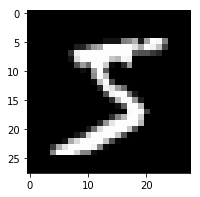

In [6]:
train_dataiterator = iter(train_loader)
images, labels = train_dataiterator.next()

images = images.numpy()
img = np.squeeze(images[0])

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        self.dropout = nn.Dropout(0.3)
    
    def forward(seld, x):
        
        x = x.view(-1, x.shape[0]*x.shape[1])
        
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = self.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        x = self.fc4(x)
        
        return x

In [11]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        self.dropout = nn.Dropout(0.3)
        

    def forward(self, x):
        
        x = x.view(-1, 28*28)
        
        x = self.leaky_relu(self.fc1(x), 0.2)
        x = self.dropout(x)
        x = self.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = self.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        x = self.tanh(self.fc4(x))
        
        return x

In [12]:
input_size = 784
d_hidden_dim = 32
d_output_size = 1

z_size = 100
g_hidden_dim = 32
g_output_size = 784

In [13]:
D = Discriminator(input_size, d_hidden_dim, d_output_size)
G = Generator(z_size,g_hidden_dim, g_output_size)

print(D)
print()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3)
)
